In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import os
from datetime import date
cwd = os.getcwd()

sns.set(style="white", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
print "Loading the tweet data..."
tweet = pd.read_csv(cwd+"\\data\\varol-data-formatted\\2100-spam-ham-tweet-04032018.csv",sep=',',header='infer', usecols=['text','user_type'])
print "Number of tweets generated by spammers:",len(tweet[tweet.user_type == 1])
print "Number of tweets generated by legitmate users:",len(tweet[tweet.user_type == 0])
tweet.head()

In [ ]:
# .value_counts() shows total number of same value
tweet.columns = ['text', 'class']
tweet['class'].value_counts()

In [2]:
# genuine
df1 = pd.read_csv("data/genuine_accounts.csv/tweets.csv", usecols=['text'])
df1.head()

,text
0,RT @morningJewshow: Speaking about Jews and co...
1,This age/face recognition thing..no reason pla...
2,Only upside of the moment I can think of is th...
3,If you're going to think about+create experien...
4,Watching a thread on FB about possible future ...


In [3]:
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826790 entries, 0 to 2826789
Data columns (total 1 columns):
text    object
dtypes: object(1)
memory usage: 21.6+ MB


In [4]:
# add col to show class 0
df1['spam'] = 0
df1.shape

(2826790, 2)

In [5]:
# fake 
fake_user = pd.read_csv("data/fake_followers.csv/tweets.csv", usecols=['text'])
social_1 = pd.read_csv("data/social_spambots_1.csv/tweets.csv", usecols=['text'])
social_2 = pd.read_csv("data/social_spambots_2.csv/tweets.csv", usecols=['text'])
social_3 = pd.read_csv("data/social_spambots_3.csv/tweets.csv", usecols=['text'])
tradition_1 = pd.read_csv("data/traditional_spambots_1.csv/tweets.csv", usecols=['text'])
# tradition_2 = pd.read_csv("data/traditional_spambots_2.csv/tweets.csv")
# tradition_3 = pd.read_csv("data/traditional_spambots_3.csv/tweets.csv")
# tradition_4 = pd.read_csv("data/traditional_spambots_4.csv/tweets.csv", nrows = 500)

list_ = []
list_.append(fake_user)
list_.append(social_1)
list_.append(social_2)
list_.append(social_3)
list_.append(tradition_1)

df2 = pd.concat(list_)

In [6]:
df2.dropna(inplace=True)
df2.reset_index(drop=True,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797819 entries, 0 to 3797818
Data columns (total 1 columns):
text    object
dtypes: object(1)
memory usage: 29.0+ MB


In [7]:
df2['spam'] = 1
df2.shape

(3797819, 2)

In [8]:
df1.to_csv("genuine_text.csv", index=False )
df2.to_csv("fake_text.csv", index=False )

In [2]:
df1 = pd.read_csv("genuine_text.csv")
df2 = pd.read_csv("fake_text.csv")

In [9]:
index = np.random.choice(2826790, 1000000)
df1 = df1.iloc[index, :]
df1.shape

(1000000, 2)

In [10]:
index = np.random.choice(3797819, 1000000)
df2 = df2.iloc[index, :]
df2.shape

(1000000, 2)

In [11]:
# df = pd.concat(df1)
df = pd.concat([df1, df2])
print df.shape
df = df.reset_index(drop=True)
df.head()

(2000000, 2)


,text,spam
0,@Mhanna__ one of my faves!,0
1,RT @alex_romano3: Can I drop out of college an...,0
2,“@SincerelyTumblr: rare pic of god communicati...,0
3,IM CRYING SO HARD TBISNUS HIKARIOUS https://t...,0
4,Rough work day. But I was able to get off an h...,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
text    object
spam    int64
dtypes: int64(1), object(1)
memory usage: 30.5+ MB


In [10]:
df['pre_clean_len'] = [len(str(t)) for t in df.text]

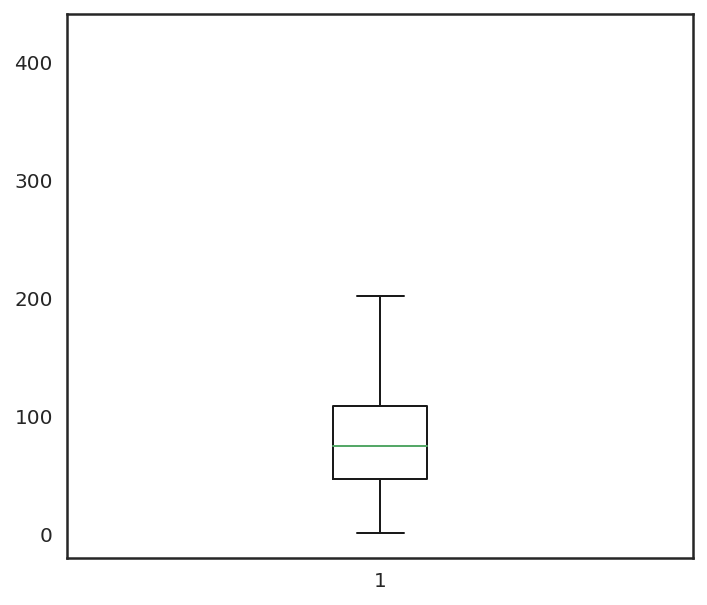

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [11]:
df[df.pre_clean_len > 140].head()

,text,spam,pre_clean_len
6,"RT @SanFranciscoBA: #enoughsenough ""Surprise! ...",0,149
7,"RT @thepatrickwalsh: Kriss Kross once rapped ""...",0,142
8,RT @TheAtlanticPOL: Watch Baltimore native @ta...,0,142
19,RT @FINALLEVEL: Jon Stewart got it RIGHT again...,0,142
32,RT @waxpancake: 17 police reform bills went up...,0,142


In [98]:
from pprint import pprint
data_dict = {
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'class':{
        'type':df.spam.dtype,
        'description':' 0:genuine, 1:fake'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

AttributeError: 'DataFrame' object has no attribute 'pre_clean_len'

In [13]:
df.to_csv("text_data.csv", index=False)

## Data Preparation 1: HTML decoding

It looks like HTML encoding has not been converted to text, and ended up in text field as '&amp','&quot',etc.<br>
Decoding HTML to general text will be my first step of data preparation.
I will use BeautifulSoup for this.

In [46]:
# find tweet has HTML encoding
for i, t in enumerate(df.text):
    if '&amp' in str(t) or '&quot' in str(t):
        print 'h', i
        break

h 41


In [45]:
# find tweet has HTML encoding
for i, t in enumerate(df.text):
    if r'www.[^ ]+' in str(t):
        print i

In [13]:
# find and choose one to examine on
df.text[41]

'RT @wkamaubell: Los Angeles! Wanna a sneak peak at my new TV show United Shades of America? Come to a free taping this Thurs. &amp; Fri. http:/\xe2\x80\xa6'

In [14]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[41], 'lxml')
print example1.get_text()

RT @wkamaubell: Los Angeles! Wanna a sneak peak at my new TV show United Shades of America? Come to a free taping this Thurs. & Fri. http:/â€¦


## Data Preparation 2: @mention

The second part of the preparation is dealing with @mention.<br>
Even though @mention carries a certain information (which another user that the tweet mentioned),
this information doesn't add value to build sentiment analysis model.

In [15]:
df.text[343]

'@simongdunham this is a really important piece. And if we could get an accurate count, I wonder what %ge of the country is sick in some way'

In [30]:
import re
re.search(r'@[A-Za-z0-9]+',df.text[343]).group()

'@simongdunham'

## Data Preparation 3: URL links

The third part of the cleaning is dealing with URL links, same with @mention,
even though it carries some information, for sentiment analysis purpose,
this can be ignored.

In [18]:
df.text[3000000]

'RT @ChiaraSoleMS: #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura\xe2\x80\xa6 http://t.co/FHxmlvwhJW'

In [32]:
sub = re.sub('https?://[A-Za-z0-9./]+','',df.text[3000000])

In [68]:
combine = r'|'.join((r"(?P<url>https?://[^\s]+)",r'@[A-Za-z0-9]+'))
print re.sub(combine, '', df.text[3000000])
url = re.search(r"(?P<url>https?://[^\s]+)", df.text[0]).group("url")

RT : #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura… 


AttributeError: 'NoneType' object has no attribute 'group'

In [43]:
from urlparse import urlparse
o = urlparse(url)
print o.netloc, o.path

t.co /FHxmlvwhJW


In [47]:
sub = sub+o.netloc+o.path
sub

'RT @ChiaraSoleMS: #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura\xe2\x80\xa6 t.co/FHxmlvwhJW'

## Data Preparation 4: UTF-8 BOM (Byte Order Mark)

In [24]:
df.text[3000000]

'RT @ChiaraSoleMS: #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura\xe2\x80\xa6 http://t.co/FHxmlvwhJW'

By looking at the above entry, I can see strange patterns of characters "\xef\xbf\xbd".
After some researching, I found that these are UTF-8 BOM.<br>
"The UTF-8 BOM is a sequence of bytes (EF BB BF) that allows the reader to identify a file as being encoded in UTF-8."

By decoding text with 'utf-8-sig', this BOM will be replaced with unicode unrecognizable special characters, then I can process this as "?"

In [26]:
testing = df.text[3000000].decode("utf-8-sig")
testing

u'RT @ChiaraSoleMS: #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura\u2026 http://t.co/FHxmlvwhJW'

In [55]:
testing.replace(u"\u2026", "?")

u'RT @ChiaraSoleMS: #anoressia #bulimia #binge #DCA #disturbialimentari #guarigione #MondoSole #prevezione #cura? http://t.co/FHxmlvwhJW'

## Data Preparation 5: hashtag / numbers

Sometimes the text used with a hashtag can provide useful information about the tweet. It might be a bit risky to get rid of all the text together with the hashtag.<br>
So I decided to leave the text intact and just remove the '#'. I will do this in the process of cleaning all the non-letter characters including numbers.

In [28]:
df.text[175]

'RT @ozsultan: Australian researchers have found a cure for hepatitis B. The new drug could also help treat HIV, Herpes and dengue http://t.\xe2\x80\xa6'

In [29]:
re.sub("[^a-zA-Z]", " ", df.text[175])

'RT  ozsultan  Australian researchers have found a cure for hepatitis B  The new drug could also help treat HIV  Herpes and dengue http   t    '

Below is the updated datacleaning function.
The order of the cleaning is 
1. Souping
2. BOM removing
3. url address('http:'pattern), twitter ID removing
4. url address('www.'pattern) removing
5. lower-case
6. negation handling
7. removing numbers and special characters
8. tokenizing and joining

In [14]:
import re
from urlparse import urlparse
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r"(?P<url>https?://[^\s]+)"
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner_updated(text):
    try:
        mention = re.search(pat1, text).group()
    except:
        mention = ''
    try:
        url = re.search(pat2, text).group("url")
        o = urlparse(url)
        netloc = o.netloc
        path = p.path
    except:
        netloc = ''
        path = ''
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\u2026", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    lower_case = stripped.lower()
    letters_only = re.sub("[^a-zA-Z]", " ", lower_case)
    letters_only = letters_only + netloc + path + mention
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [15]:
df = pd.read_csv("text_data.csv")
df.head()

,text,spam
0,@Mhanna__ one of my faves!,0
1,RT @alex_romano3: Can I drop out of college an...,0
2,“@SincerelyTumblr: rare pic of god communicati...,0
3,IM CRYING SO HARD TBISNUS HIKARIOUS https://t...,0
4,Rough work day. But I was able to get off an h...,0


In [16]:
df[df.isnull().any(axis=1)].head()
np.sum(df.isnull().any(axis=1))

0

In [17]:
df.isnull().any(axis=0)

text    False
spam    False
dtype: bool

In [18]:
%%time
print "Cleaning the tweets...\n"
clean_tweet_texts = []
for i in xrange(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print "Tweets %d of %d has been processed" % ( i+1, len(df) )                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning the tweets...

Tweets 100000 of 2000000 has been processed
Tweets 200000 of 2000000 has been processed
Tweets 300000 of 2000000 has been processed
Tweets 400000 of 2000000 has been processed
Tweets 500000 of 2000000 has been processed
Tweets 600000 of 2000000 has been processed
Tweets 700000 of 2000000 has been processed
Tweets 800000 of 2000000 has been processed
Tweets 900000 of 2000000 has been processed
Tweets 1000000 of 2000000 has been processed
Tweets 1100000 of 2000000 has been processed
Tweets 1200000 of 2000000 has been processed
Tweets 1300000 of 2000000 has been processed
Tweets 1400000 of 2000000 has been processed
Tweets 1500000 of 2000000 has been processed
Tweets 1600000 of 2000000 has been processed
Tweets 1700000 of 2000000 has been processed
Tweets 1800000 of 2000000 has been processed
Tweets 1900000 of 2000000 has been processed
Tweets 2000000 of 2000000 has been processed
Wall time: 30min 37s


In [19]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.spam
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [20]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,one of my faves Mhanna__,0
1,rt can drop out of college and go to hogwarts ...,0
2,rare pic of god communicating with taylor swif...,0
3,im crying so hard tbisnus hikarious,0
4,rough work day but was able to get off an hour...,0


In [21]:
genuine_tweets = my_df[my_df.target == 0]
genuine_string = []
for t in genuine_tweets.text:
    genuine_string.append(t)
genuine_string = pd.Series(genuine_string).str.cat(sep=' ')

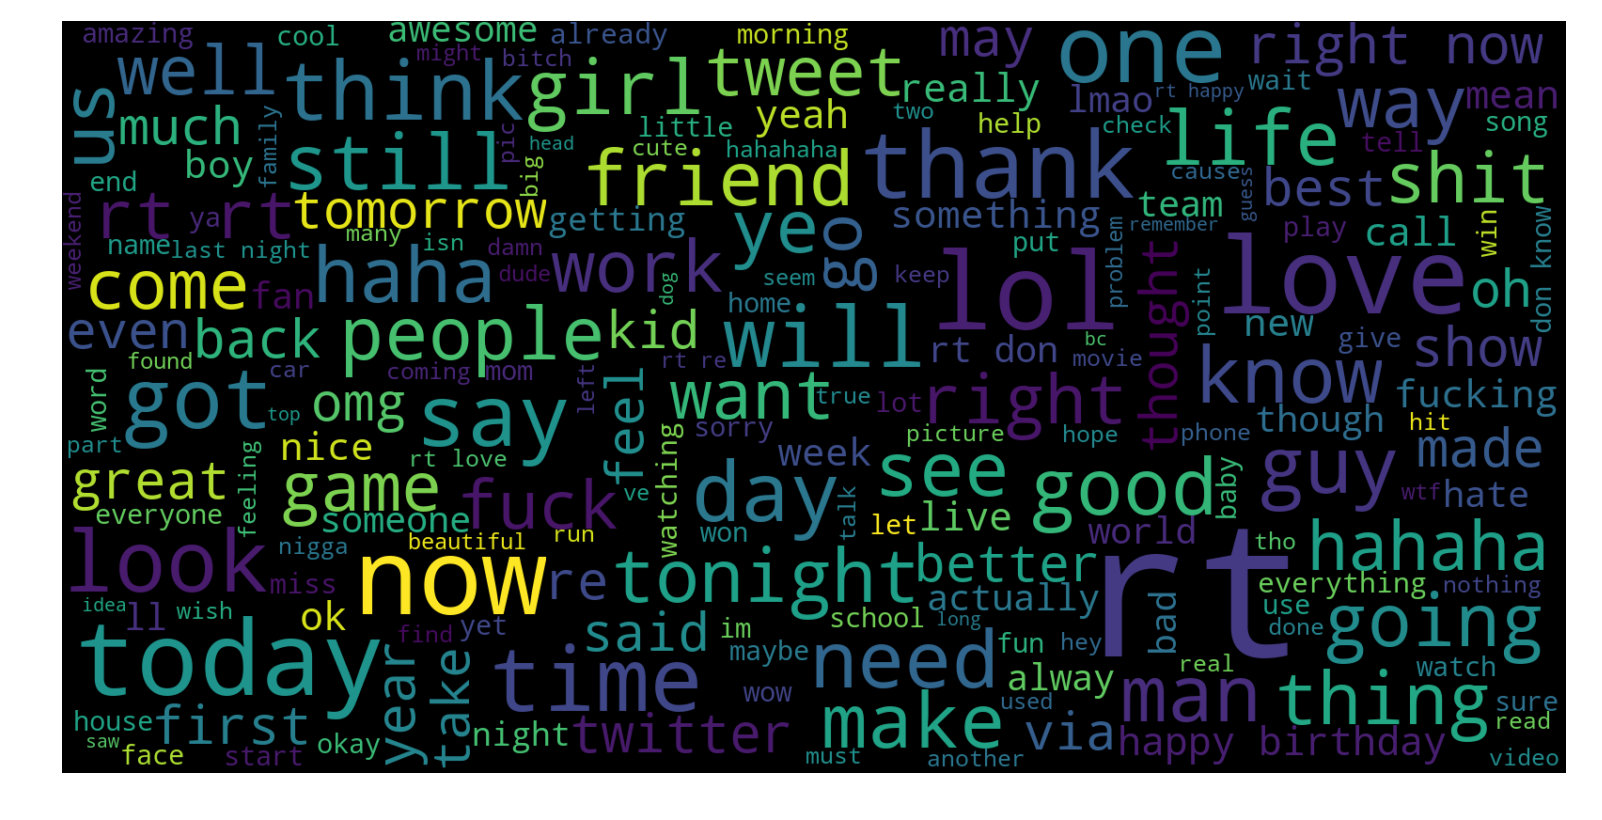

Wall time: 1min 23s


In [22]:
%%time
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(genuine_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
spam_tweets = my_df[my_df.target == 1]
spam_string = []
for t in spam_tweets.text:
    spam_string.append(t)
spam_string = pd.Series(spam_string).str.cat(sep=' ')

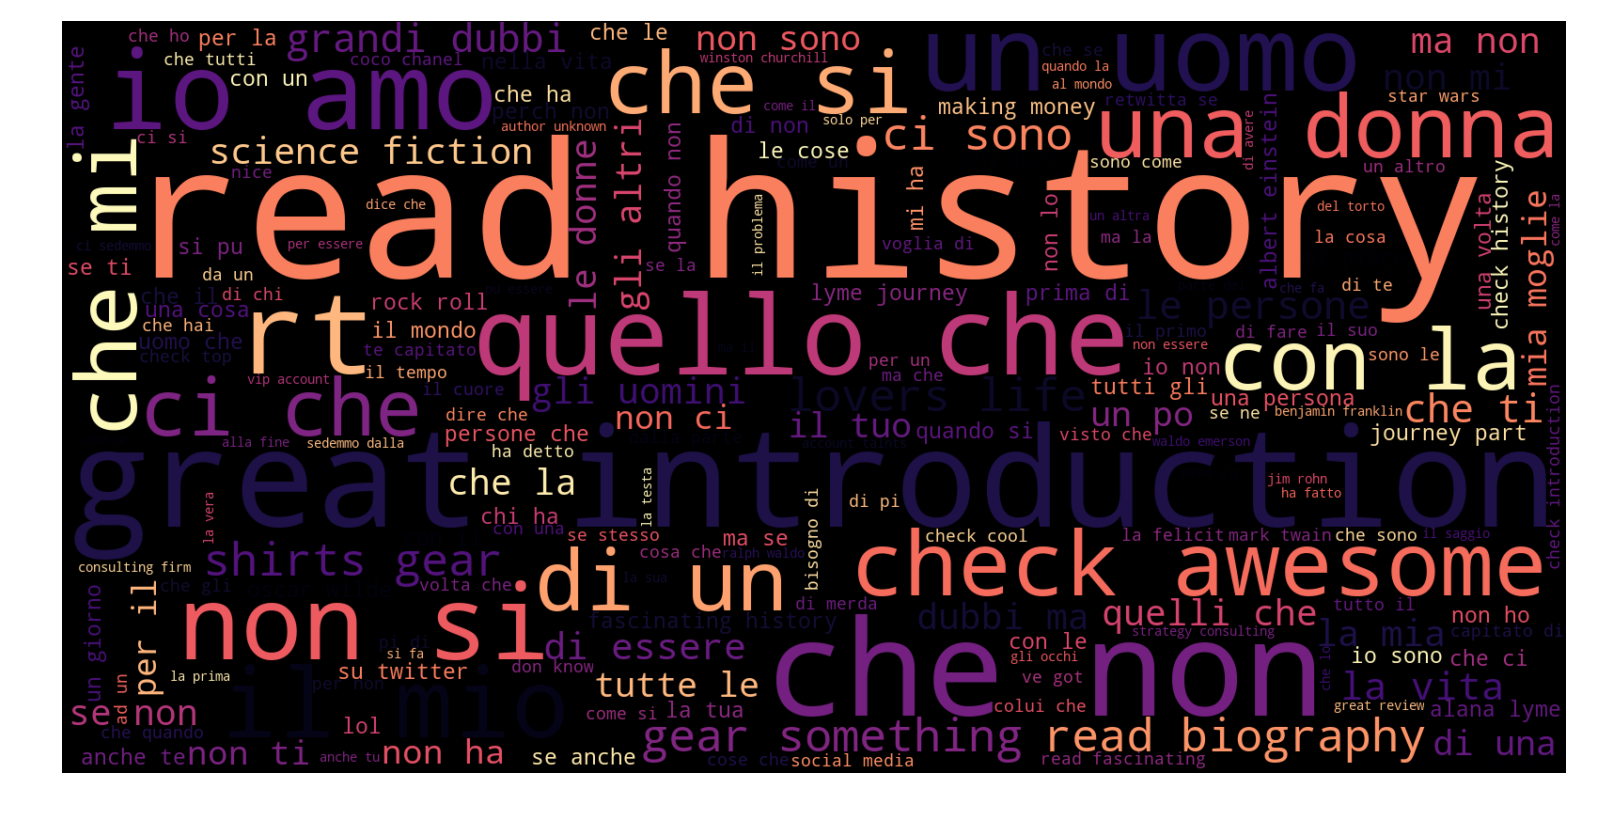

Wall time: 58.3 s


In [24]:
%%time
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(spam_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [26]:
my_df[my_df.isnull().any(axis=1)].head()
np.sum(my_df.isnull().any(axis=1))

35971

In [27]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964029 entries, 0 to 1964028
Data columns (total 2 columns):
text      object
target    int64
dtypes: int64(1), object(1)
memory usage: 30.0+ MB


In [28]:
x = my_df.text
y = my_df.target

In [29]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

D:\Python35\envs\dl27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

In [32]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result

In [33]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [34]:
len(all_x_w2v)

1964029

In [35]:
all_x_w2v[:5]

[TaggedDocument(words=['sorry', 'prime', 'minister', 'netanyahu', 'iran', 'is', 'not', 'the', 'islamic', 'state'], tags=['all_244422']),
 TaggedDocument(words=['nan', 'nan', 'Pierre_Spdk'], tags=['all_896919']),
 TaggedDocument(words=['chrns999'], tags=['all_642141']),
 TaggedDocument(words=['incertidumbres', 'La_SER'], tags=['all_638127']),
 TaggedDocument(words=['top', 'films', 'of', 'the', 'theband'], tags=['all_1113804'])]

## DBOW

In [37]:
%%time
cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

100%|███████████████████████████| 1964029/1964029 [00:00<00:00, 2657685.27it/s]


Wall time: 52 s


According to the developer Radim Řehůřek who created Gensim,
"One caveat of the way this algorithm runs is that, since the learning rate decrease over the course of iterating over the data, labels which are only seen in a single LabeledSentence during training will only be trained with a fixed learning rate. This frequently produces less than optimal results."

Below iteration implement explicit multiple-pass, alpha-reduction approach with added shuffling. This has been already presented in Gensim's IMDB tutorial.

In [38]:
%%time
for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha

100%|███████████████████████████| 1964029/1964029 [00:00<00:00, 2514762.17it/s]


Wall time: 54min 3s


In [39]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

In [40]:
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 100)

In [41]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
clf.score(validation_vecs_dbow, y_validation)

0.8675152749490835

Even though the DBOW model doesn't learn the meaning of the individual words, but as features to feed to a classifier, it seems like it's doing its job.

But the result doesn't seem to excel count vectorizer or Tfidf vectorizer. It might not be a direct comparison since either count vectorizer of Tfidf vectorizer uses a large number of features to represent a tweet, but in this case, a vector for each tweet has only 200 dimensions.

In [43]:
model_ug_dbow.save('d2v_model_ug_dbow.doc2vec')
model_ug_dbow = Doc2Vec.load('d2v_model_ug_dbow.doc2vec')

In [25]:
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)